In [13]:
import numpy as np
import matplotlib.pyplot as plt
# 图嵌在网页里
%matplotlib inline 

# Ploynomial Curve Fitting 

## Data preparation

In [14]:
def create_toy_data(f, sample_size, std=0.25, noise=True):
    x = np.linspace(0, 1, sample_size)
    if noise:
        y = f(x) + np.random.normal(scale=std, size=x.shape)
    else:
        y = f(x)
    return x, y

In [15]:
def f(x):
    return np.sin(2 * np.pi * x)

In [16]:
x_train, y_train = create_toy_data(f, 30)
x_test, y_test = create_toy_data(f, 100)
x_exact, y_exact = create_toy_data(f, 100, noise=False)

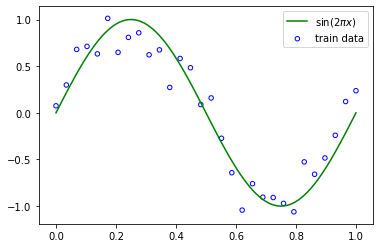

In [17]:
plt.plot(x_exact, y_exact, color='g', label='$\sin(2\pi x)$')
plt.scatter(x_train, y_train, s=20, fc='none', ec='b', label='train data') 
#fc = facecolor, ec = edgecolor
plt.legend()
plt.show()

## Regression

In [18]:
class Regression(object):
    pass

## Linear Regression

In [19]:
class LinearRegression(Regression):
    """Linear Regression Model
    y = X @w
    """
    def fit(self, X, y):# training
        """y = X @ w
        X_t @ y = X_t @ X @ w
        w = inv(X_t @ X) @ X_t @ y 
        """
        self.w = np.linalg.pinv(X) @ y
    def predict(self, X):# testing
        return X @ self.w
        

## Polynomial Feature

In [20]:
import itertools
import functools

In [21]:
class PloynomialFeature(object):
    def __init__(self, degree=2):
        if not isinstance(degree, int):
            raise TypeError('degree should be int')
        self.degree = degree
    
    def transform(self, x):
        """
        Params
        ======
        x: ndarray (sample_size, n)
        """
        if x.ndim == 1:
            x = x[:,None]
        x_t = x.transpose()
        features = [np.ones(len(x))]
        for d in range(1, self.degree+1):
            for item in itertools.combinations_with_replacement(x_t, d):
                features.append(functools.reduce(lambda x, y: x * y, item))
        return np.array(features).transpose()

In [22]:
x = np.array([1,2])
feature = PloynomialFeature(2)
X = feature.transform(x)
print(X)

[[1. 1. 1.]
 [1. 2. 4.]]


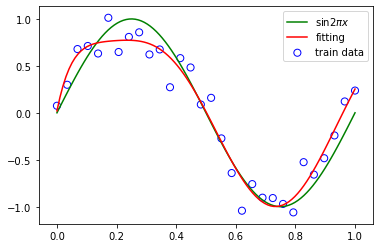

In [23]:
# Generate data
feature = PloynomialFeature(7)
X_train = feature.transform(x_train)
X_test = feature.transform(x_test)

# Model
model = LinearRegression()

# training
model.fit(X_train, y_train)

# testing
y = model.predict(X_test)

# plot
plt.scatter(x_train, y_train, fc='none', ec='b', s=50, label='train data')
plt.plot(x_exact, y_exact, c='g', label='$\sin 2\pi x$')
plt.plot(x_test, y, c='r', label='fitting')
plt.legend()
plt.show()

In [24]:
x = np.array([1,2])
print(x.ndim)
print(x[:,None].ndim)

1
2


# Bayesian Regression
$Ols \longrightarrow \omega_{MLE} \stackrel{x}{\longrightarrow} y$

$Ridge \longrightarrow \omega_{MAP} \stackrel{x}{\longrightarrow} y$

$Bayes \longrightarrow p(\omega|D) \stackrel{x}{\longrightarrow} p(y|x,D)(代表着y的范围)$


In [28]:
class BayesianRegression(Regression):
    def __init__(self, a=1., b=1.):
        self.a = a
        self.b = b
        self.w_mean = None # mu_0
        self.w_prec = None # Lambda_0
        
    def _is_prior_defined(self):
        return self.w_mean is not None and self.w_prec is not None
        # 都存在，认为先验分布已经定义了
        
    def _get_prior(self):
        if self._is_prior_defined():
            return self.w_mean, self.w_prec
        else:
            return np.zeros(ndim), 1 / self.b * np.eyes(ndim)
        
    def fit(self):
        """
        params
        ======
        X: ndarray with shape(N, K)
        """
        mean_prior, prec_prior = self._get_prior(self, X.shape[1])
        
        w_prec = prec_prior + self.a * X.T @ X
        
        w_mean = np.linalg.solve(w_prec, prec_prior @ mean_prior + self.a * X.T @ y)
        # 希望数据一个一个进，如果是一次性可以按照课件写
        self.w_mean = w_mean
        self.w_prec = w_prec
        self.W_cov = np.linalg.inv(self.w_prec)
        
    def predict(self,X):
        return X @ self.w_mean
    
    
        
        

In [29]:
X = np.random.randn(3,3)
X

array([[ 0.69106813,  1.29031405,  1.81605884],
       [-0.95460617,  0.67594761,  0.63450562],
       [-1.32161986,  1.10402855, -2.53273872]])

In [30]:
X.transpose()

array([[ 0.69106813, -0.95460617, -1.32161986],
       [ 1.29031405,  0.67594761,  1.10402855],
       [ 1.81605884,  0.63450562, -2.53273872]])